# E-Signing Loans
### Written by Leo Carrico

For this project, we will be looking at series of data relating to customers and whether or not they have e-signed for a loan. The goal here will be to predict, based on User data, whether the User will finalize the step to e-sign for the final loan. <br>
Here we can see what factors impact the virtual finalization of a loan for Users.

## Importing the Data

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv("data/Financial-Data.csv")

In [42]:
data.dtypes

entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

In [43]:
response = data['e_signed']
data = data.drop(columns=['e_signed', 'entry_id'])

In [44]:
data.isna().any()

age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
dtype: bool

In [45]:
data['months_employed'] = data['months_employed'] + (data['years_employed'] * 12)
data = data.drop(columns=['years_employed'])
data.columns

Index(['age', 'pay_schedule', 'home_owner', 'income', 'months_employed',
       'current_address_year', 'personal_account_m', 'personal_account_y',
       'has_debt', 'amount_requested', 'risk_score', 'risk_score_2',
       'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month'],
      dtype='object')

In [46]:
data['personal_account_m'] = data['personal_account_m'] + (data['personal_account_y'] * 12)
data = data.drop(columns=['personal_account_y'])
data.columns

Index(['age', 'pay_schedule', 'home_owner', 'income', 'months_employed',
       'current_address_year', 'personal_account_m', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month'],
      dtype='object')

In [47]:
print(data.describe())

                age    home_owner        income  months_employed  \
count  17908.000000  17908.000000  17908.000000     17908.000000   
mean      43.015412      0.425173   3657.214653        43.508320   
std       11.873107      0.494383   1504.890063        26.765085   
min       18.000000      0.000000    905.000000         0.000000   
25%       34.000000      0.000000   2580.000000        24.000000   
50%       42.000000      0.000000   3260.000000        36.000000   
75%       51.000000      1.000000   4670.000000        60.000000   
max       96.000000      1.000000   9985.000000       201.000000   

       current_address_year  personal_account_m      has_debt  \
count          17908.000000        17908.000000  17908.000000   
mean               3.584711           45.467389      0.795399   
std                2.751937           23.258829      0.403421   
min                0.000000            0.000000      0.000000   
25%                2.000000           29.000000      1.000000 

## Data Visualization

In [48]:
base_features = data.copy()

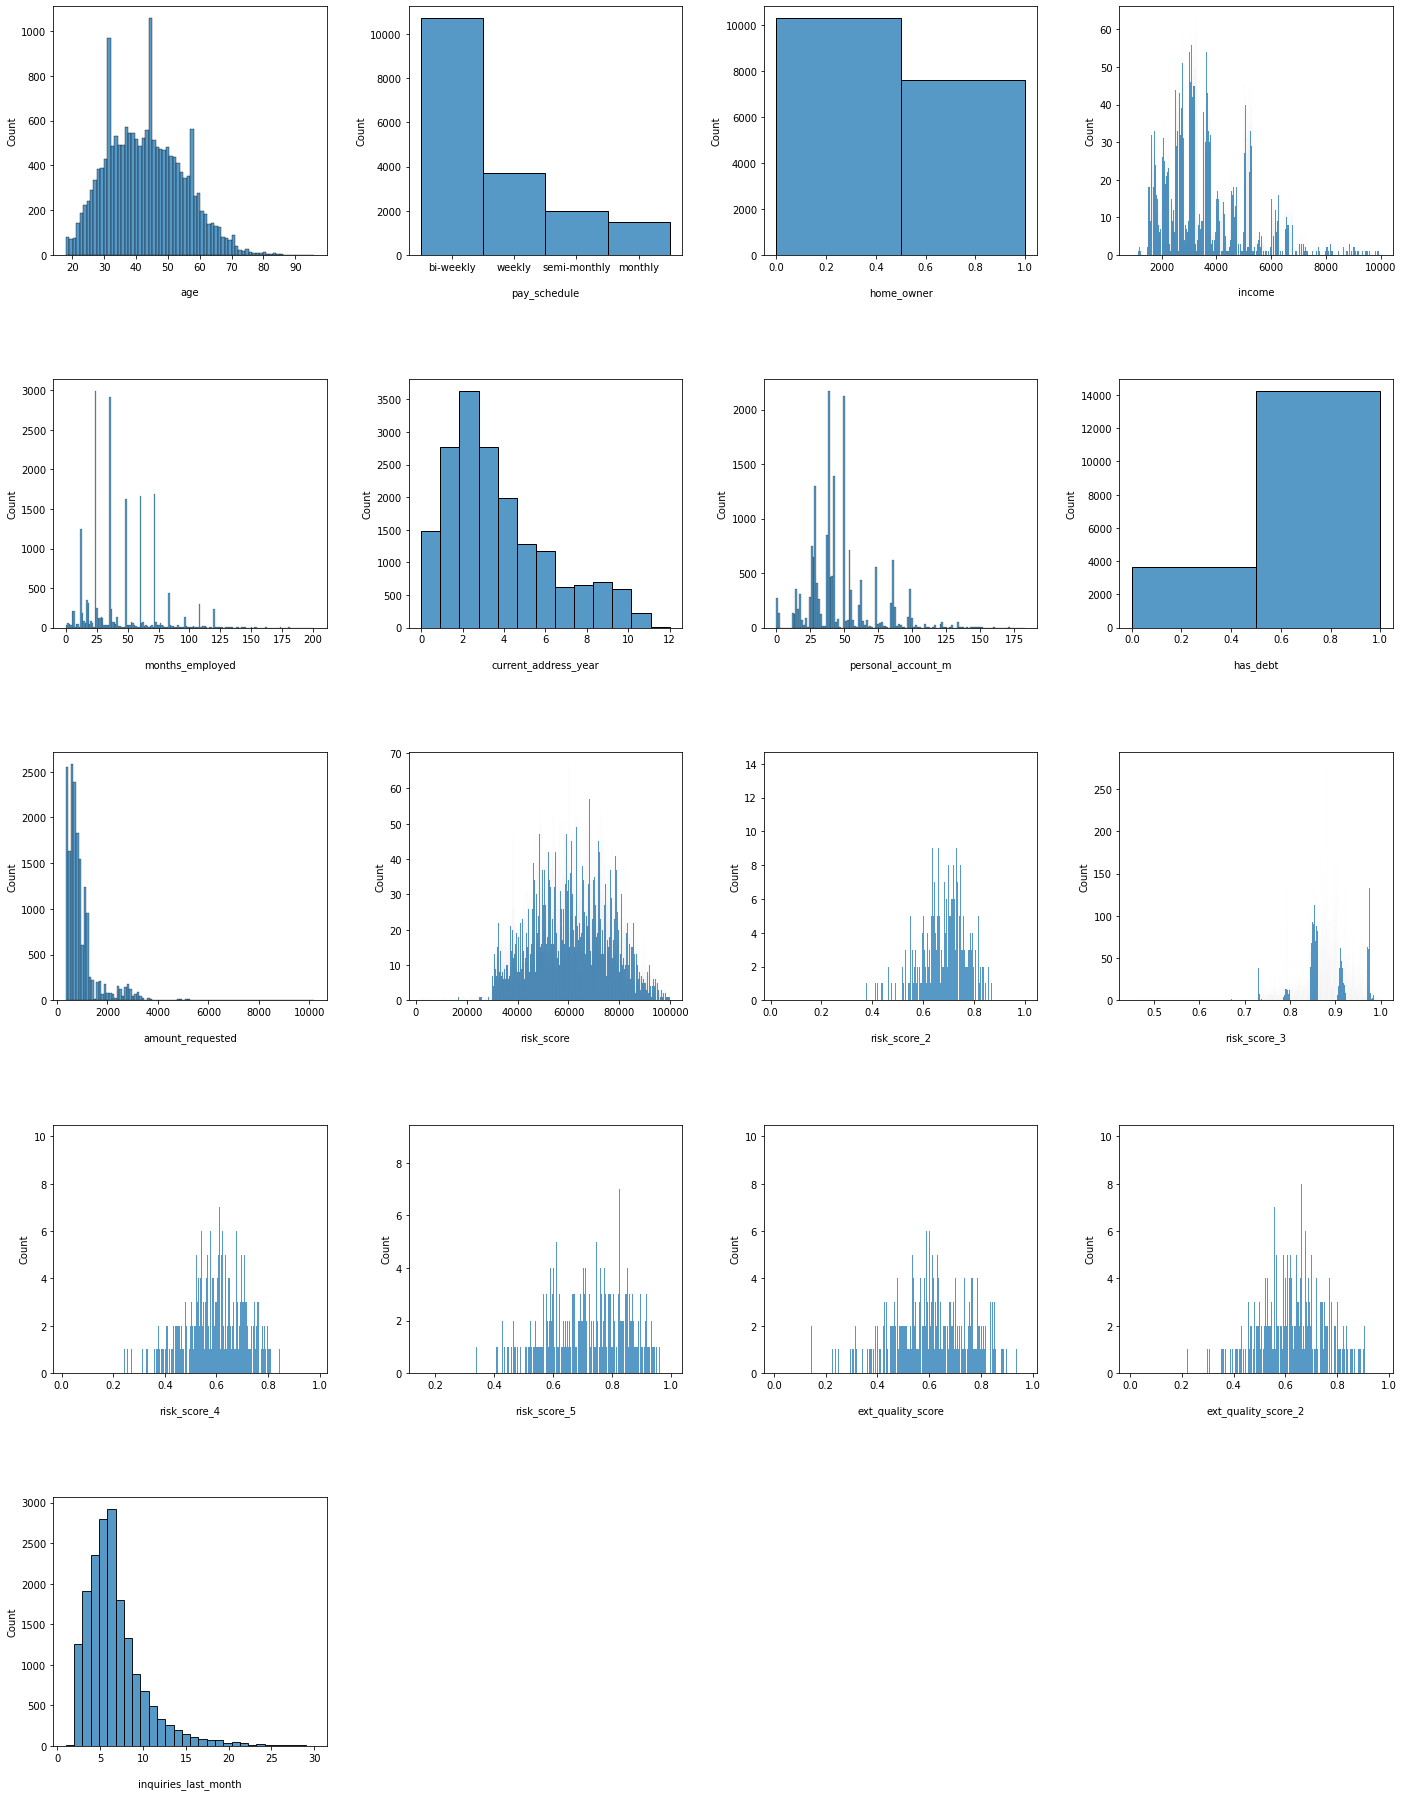

In [49]:
n = len(base_features.columns)
cols = 4
rows = round(n/cols + 0.5)

fig, ax = plt.subplots(rows, cols, figsize=(24,32))
for i in range(rows):
    for j in range(cols):
        curr = cols*i + j
        if curr >= n:
            ax[i, j].axis('off')
        else:
            ax[i,j].xaxis.labelpad = 15
            bins = len(data[base_features.columns[curr]].unique())
            sns.histplot(data=data, x=base_features.columns[curr], ax=ax[i, j], bins=bins)

plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [50]:
corrs = data.corrwith(response)
corrs

age                    -0.096998
home_owner             -0.047409
income                  0.031377
months_employed         0.004705
current_address_year   -0.018969
personal_account_m     -0.032114
has_debt                0.039192
amount_requested        0.069572
risk_score              0.086098
risk_score_2            0.010473
risk_score_3           -0.037483
risk_score_4            0.006147
risk_score_5           -0.007541
ext_quality_score      -0.032129
ext_quality_score_2    -0.024271
inquiries_last_month   -0.025165
dtype: float64

<AxesSubplot:>

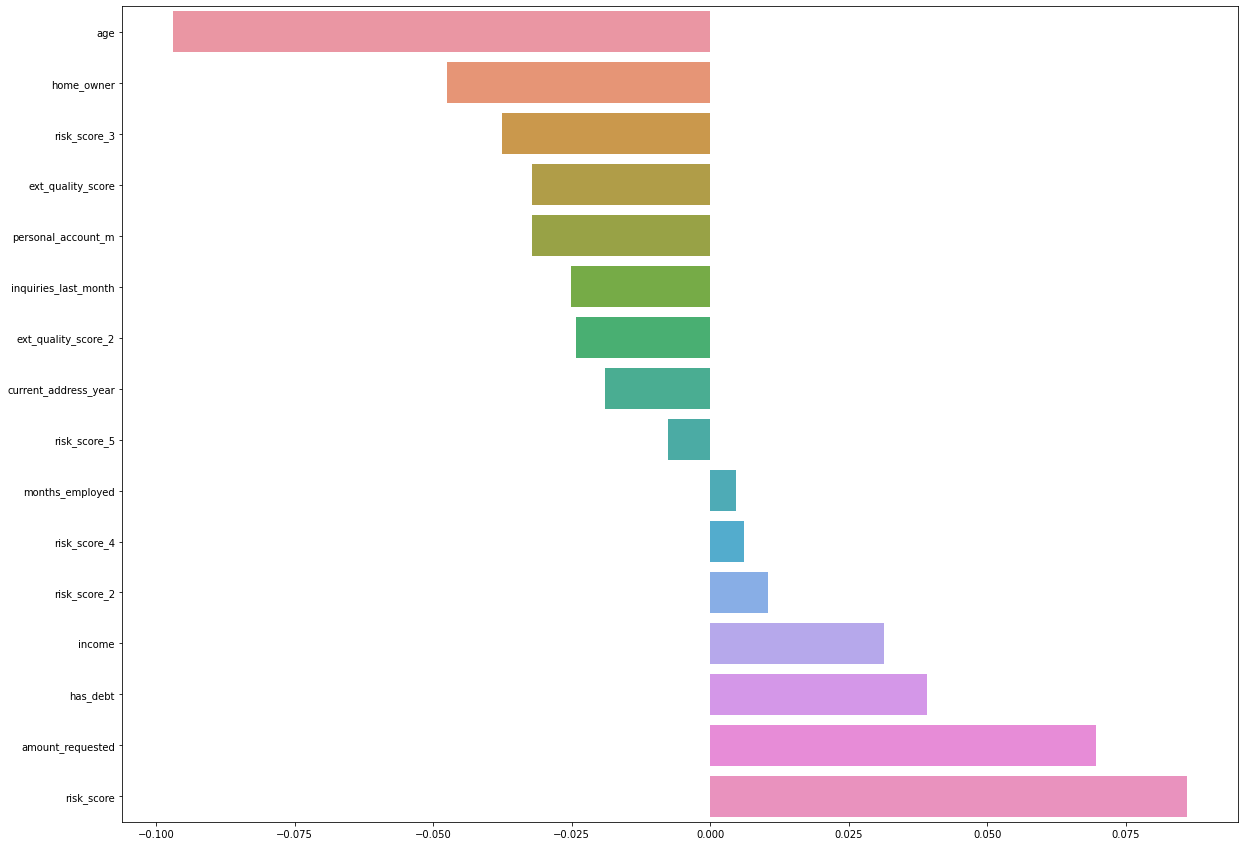

In [51]:
corrs_sorted = corrs.sort_values()
plt.figure(figsize=(20, 15))
sns.barplot(x=corrs_sorted.values, y=corrs_sorted.index)

<AxesSubplot:>

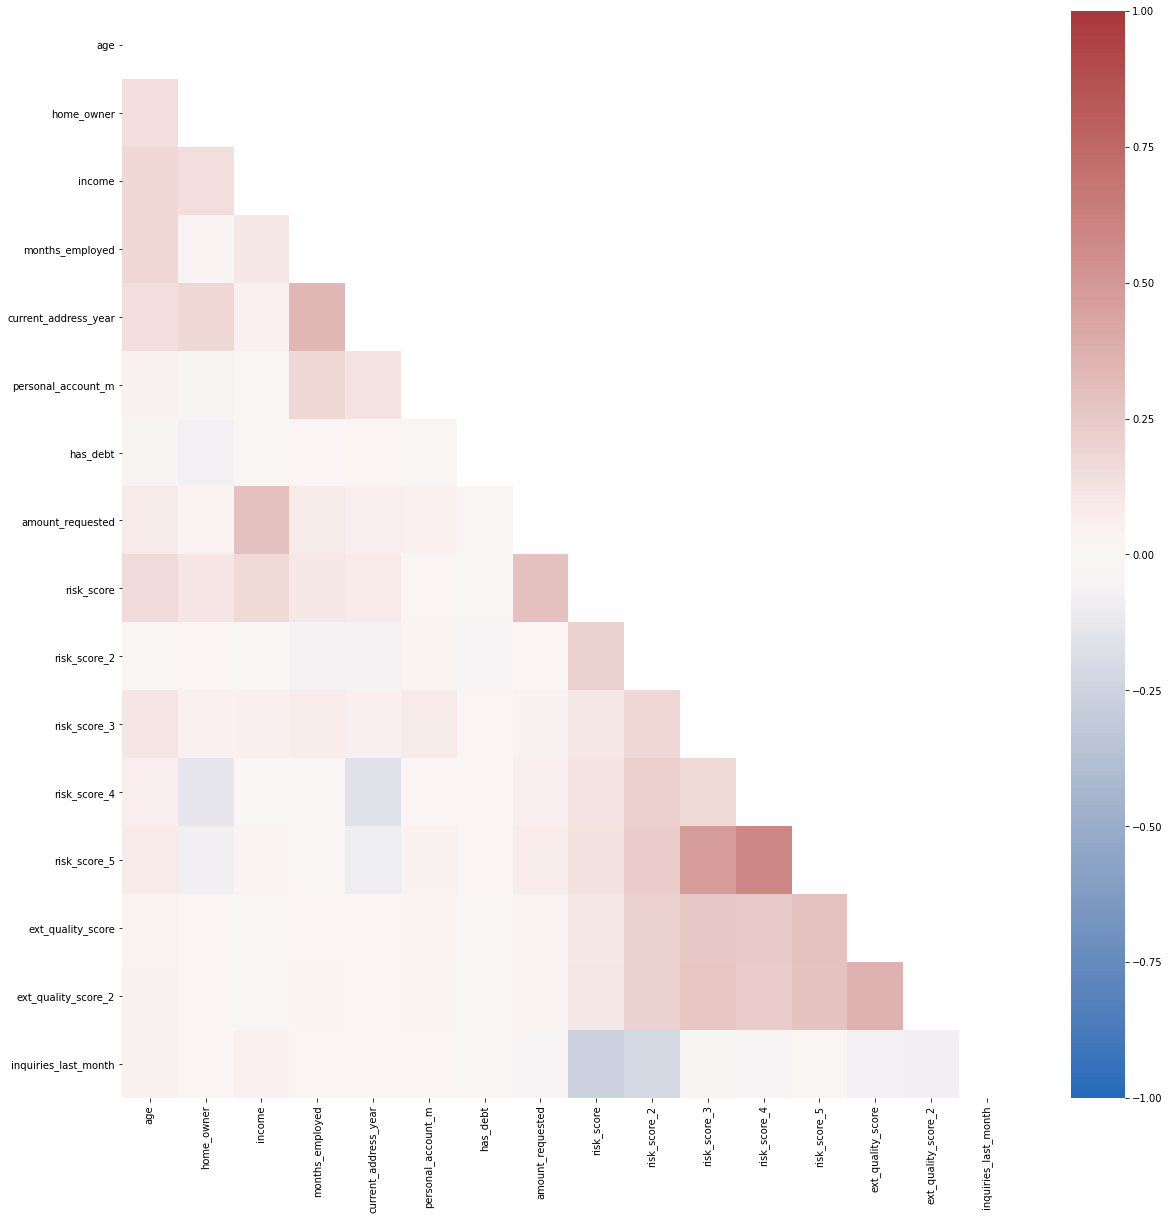

In [52]:
corr_all = data.corr()
plt.figure(figsize=(20,20))
mask = np.triu(corr_all)
sns.heatmap(data=corr_all, cmap="vlag", mask=mask, vmin=-1, vmax=1)

## Feature Engineering

In [53]:
data = pd.get_dummies(data)
data.dtypes

age                            int64
home_owner                     int64
income                         int64
months_employed                int64
current_address_year           int64
personal_account_m             int64
has_debt                       int64
amount_requested               int64
risk_score                     int64
risk_score_2                 float64
risk_score_3                 float64
risk_score_4                 float64
risk_score_5                 float64
ext_quality_score            float64
ext_quality_score_2          float64
inquiries_last_month           int64
pay_schedule_bi-weekly         uint8
pay_schedule_monthly           uint8
pay_schedule_semi-monthly      uint8
pay_schedule_weekly            uint8
dtype: object

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [58]:
scaler = StandardScaler()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, response)

In [85]:
X_train.head(5)

,age,home_owner,income,months_employed,current_address_year,personal_account_m,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
14794,24,1,3867,16,2,25,1,700,69700,0.783796,0.887861,0.394885,0.606904,0.460604,0.560604,2,0,0,1,0
7938,20,1,1740,77,3,27,1,600,58100,0.693713,0.845147,0.277544,0.519785,0.665442,0.465442,2,1,0,0,0
6253,24,0,5145,36,5,14,1,600,72750,0.732784,0.869849,0.533885,0.619728,0.627261,0.527261,7,1,0,0,0
4953,58,1,5175,36,5,37,0,1150,60550,0.677929,0.894517,0.559655,0.792917,0.594247,0.594247,2,0,0,1,0
9713,26,0,2005,10,2,55,1,550,36050,0.680866,0.911317,0.705397,0.761308,0.794830,0.594830,10,1,0,0,0


In [62]:
scaler = scaler.fit(X_train, y_train)

In [63]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
y_train.value_counts()

1    7235
0    6196
Name: e_signed, dtype: int64

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
smote = SMOTE()
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

y_train.value_counts()

0    7235
1    7235
Name: e_signed, dtype: int64

## Training our Model

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
clf = LogisticRegression(penalty='l2')

In [91]:
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [92]:
y_pred = clf.predict(X_test_scaled)

## Optimizing Our Model

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

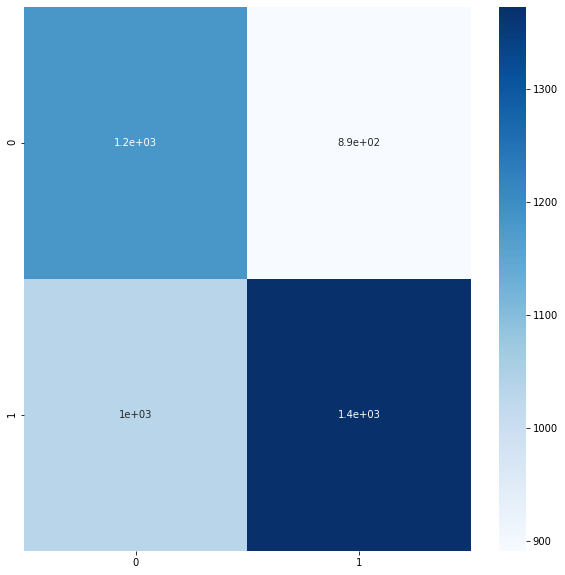

In [94]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm, cmap="Blues", annot=True)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      2073
           1       0.61      0.57      0.59      2404

    accuracy                           0.57      4477
   macro avg       0.57      0.57      0.57      4477
weighted avg       0.57      0.57      0.57      4477



In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']},
]

gs = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1)

In [98]:
gs = gs.fit(X_train_scaled, y_train)
gs.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'C': 0.23357214690901212, 'penalty': 'l1', 'solver': 'liblinear'}

In [99]:
clf = LogisticRegression(**gs.best_params_)
clf.fit(X_train_scaled, y_train)

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

In [100]:
y_pred = clf.predict(X_test_scaled)

<AxesSubplot:>

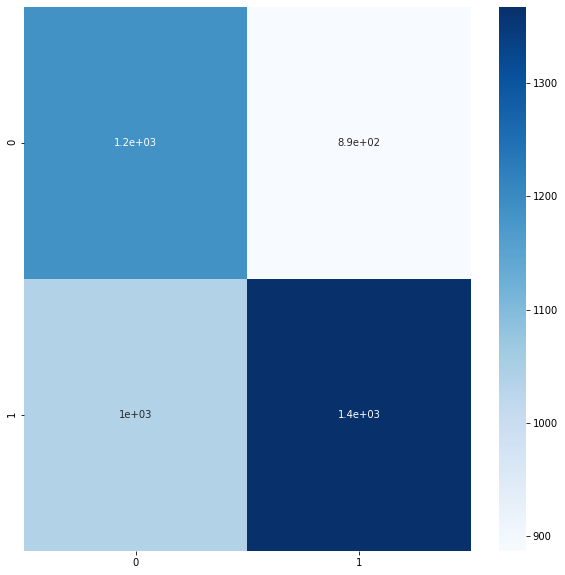

In [101]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm, cmap="Blues", annot=True)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      2073
           1       0.61      0.57      0.59      2404

    accuracy                           0.57      4477
   macro avg       0.57      0.57      0.57      4477
weighted avg       0.57      0.57      0.57      4477



## Conclusion
In conclusion, we see that there is potentional in using a Logistic Regression to predict loan signing, however the accuracy is pretty weak. <br>Things to approve upon would most likely be to gain more data from the users towards their decision making. Another improvement could be to try ensemble methods for classification like Random Forest and Gradient Boosting. 